In [3]:
%matplotlib inline

In [25]:
import numpy as np
import matplotlib
matplotlib.use('agg')
from matplotlib import pyplot as plt

/home/ytanigaw/.conda/envs/pgenlib/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [38]:
def make_scatter(x, y, title = None, xlabel = None, ylabel = None, filename = None):
    '''
    This function generates scatter plot of a pair of vectors x and y, and save to file
    Inputs:
      x, y: data vectors
      title:    title of the plot
      xlabel:   label on x-axis
      ylabel:   label on y-axis
      filename: name of the image file (if given, save to file)
    Side effect:
      save an image file if filename is given
    '''
    
    import matplotlib
    matplotlib.use('agg')
    from matplotlib import pyplot as plt
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x, y)
    
    if(xlabel != None):
        ax.set_xlabel(xlabel)
    if(ylabel != None):
        ax.set_ylabel(ylabel)
    if(title != None):
        ax.set_title(title)
    if(filename != None):
        fig.savefig(filename)    

# extract error rate info from summary stats file (hap file)

In [9]:
!mktemp -d

/local-scratch/ytanigaw/33173/tmp.N2ePtuYnvF


In [17]:
hap_file='/share/PI/mrivas/data/nanopore-wgs-consortium/rel3/hg19/chr20/rel3.chr20.12500.10k.hap'

In [23]:
!cat /share/PI/mrivas/data/nanopore-wgs-consortium/rel3/hg19/chr20/rel3.chr20.12500.10k.hap \
  | awk -v OFS=',' '{print $3-$2, $6}' \
  > /local-scratch/ytanigaw/33173/tmp.N2ePtuYnvF/error.stats

In [24]:
!head /local-scratch/ytanigaw/33173/tmp.N2ePtuYnvF/error.stats

5197,1.480541e-03
14664,7.555723e-04
6704,8.315317e-04
10801,1.924830e-03
5640,5.968961e-04
8575,1.676987e-03
54839,2.771973e-04
12882,9.329941e-04
10334,9.874918e-04
3825,1.414827e-03


- 1st column: length of the read
- 2nd column: read specific error rate

In [30]:
tbl = np.loadtxt('/local-scratch/ytanigaw/33173/tmp.N2ePtuYnvF/error.stats', delimiter= ',')

In [33]:
tbl

array([[  5.19700000e+03,   1.48054100e-03],
       [  1.46640000e+04,   7.55572300e-04],
       [  6.70400000e+03,   8.31531700e-04],
       ..., 
       [  1.40040000e+04,   8.81127800e-04],
       [  9.23400000e+03,   1.86451200e-03],
       [  4.30200000e+03,   5.50660800e-04]])

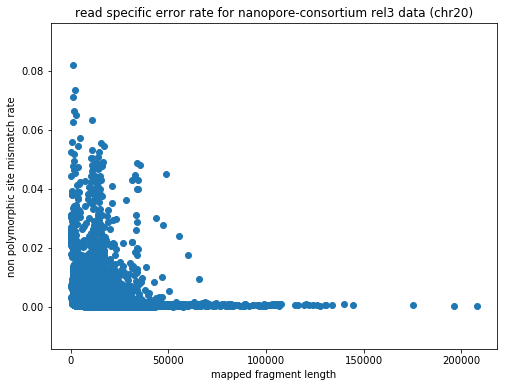

In [41]:
make_scatter(tbl[:, 0], tbl[:, 1], title='read specific error rate for nanopore-consortium rel3 data (chr20)', 
            xlabel = 'mapped fragment length', ylabel = 'non polymorphic site mismatch rate', 
            filename = './rel3.chr20.12500.10k.hap.errorrate.png')

In [44]:
np.sum(tbl[:, 1] < 0.001)

25257

In [45]:
tbl.shape

(33577, 2)

This means # of reads : 33577, of which 25257 have read specific error rate < 0.001